<a href="https://colab.research.google.com/github/changsksu/laser/blob/main/1_OSL_regression_07_27_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laser Scribing Analysis**
This code analyzes both the 21 data with RA outliers and the data without 3 outliers. Full 2nd order model and reduced model are run.

In [84]:
import numpy as np
from patsy import bs
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#read csv
#with three rows of outliers at obs 18, 19, and 20
# the coded variables x1, x2, and x3 are based on all obs
df = pd.read_csv('https://raw.githubusercontent.com/changsksu/laser/main/laserexp7.csv')
df

,x1,x2,x3,E(uJ),tp(ps),fp(Hz),MSE,RA,Con
0,0.31,1.00,-0.99,240,10.000,500,0.003610,37.94,Con 8
1,0.31,-0.83,-1.00,240,1.000,250,0.006380,44.61,Con 11
2,1.00,-0.63,-1.00,360,2.000,250,0.004470,49.86,Con 15
3,-0.37,1.00,-0.98,120,10.000,1000,0.000750,46.43,Con 35
4,-0.92,-0.94,-0.80,24,0.500,10000,0.001070,42.06,Con 57
5,-0.92,1.00,-0.80,24,10.000,10000,0.001920,69.94,Con 60
6,-0.78,-1.00,-0.96,48,0.184,2000,0.000592,40.90,Con 71
7,-0.78,1.00,-0.96,48,10.000,2000,0.000550,32.18,Con 75
8,-0.46,1.00,-0.98,105,10.000,1000,0.001110,29.20,Con 85
9,-0.89,-0.83,-0.96,30,1.000,2000,0.000473,41.08,Con 88


In [30]:
E_min = df['E(uJ)'].min()
E_max = df['E(uJ)'].max()
range= (E_max- E_min)/2
range= (E_max- E_min)
mu= E_min + range/2
mu

185.0

In [32]:
#convert the data into coded varialbe (all obs)
#
# NOTE THAT THE AVERAGE SHOULD HAVE BEEN THE CENTER OF EXPERITIAL SPACE RATHER THAN THE WEIGHTED AVERAGE
#
# Assuming you have your dataset loaded into a DataFrame called 'df'
# If not, you can load the data using pandas read_csv or other methods

# Step 1: Calculate the average, minimum, and maximum values of 'E'
# E_average = df['E(uJ)'].mean()
E_min = df['E(uJ)'].min()
E_max = df['E(uJ)'].max()
range= (E_max- E_min)
mu= E_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df['E_coded'] = round((df['E(uJ)'] - mu) / (range /2),2)

# Step 3: Print the DataFrame with the normalized 'E' values

# tp normalization
# tp_average = df['tp(ps)'].mean()
tp_min=df['tp(ps)'].min()
tp_max=df['tp(ps)'].max()
range= (tp_max- tp_min)
mu= tp_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df['tp(ps)_coded'] = round((df['tp(ps)'] - mu) / (range /2),2)

#fp normalization

#fp_average = df['fp(Hz)'].mean()
fp_min=df['fp(Hz)'].min()
fp_max=df['fp(Hz)'].max()

range= (fp_max- fp_min)
mu= fp_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df['fp(Hz)_coded'] = round((df['fp(Hz)'] - mu) / (range /2),2)

df

,x1,x2,x3,E(uJ),tp(ps),fp(Hz),MSE,RA,Con,E_coded,tp(ps)_coded,fp(Hz)_coded
0,0.31,1.00,-0.99,240,10.000,500,0.003610,37.94,Con 8,0.31,1.00,-0.99
1,0.31,-0.83,-1.00,240,1.000,250,0.006380,44.61,Con 11,0.31,-0.83,-1.00
2,1.00,-0.63,-1.00,360,2.000,250,0.004470,49.86,Con 15,1.00,-0.63,-1.00
3,-0.37,1.00,-0.98,120,10.000,1000,0.000750,46.43,Con 35,-0.37,1.00,-0.98
4,-0.92,-0.94,-0.80,24,0.500,10000,0.001070,42.06,Con 57,-0.92,-0.94,-0.80
5,-0.92,1.00,-0.80,24,10.000,10000,0.001920,69.94,Con 60,-0.92,1.00,-0.80
6,-0.78,-1.00,-0.96,48,0.184,2000,0.000592,40.90,Con 71,-0.78,-1.00,-0.96
7,-0.78,1.00,-0.96,48,10.000,2000,0.000550,32.18,Con 75,-0.78,1.00,-0.96
8,-0.46,1.00,-0.98,105,10.000,1000,0.001110,29.20,Con 85,-0.46,1.00,-0.98
9,-0.89,-0.83,-0.96,30,1.000,2000,0.000473,41.08,Con 88,-0.89,-0.83,-0.96


In [33]:
#set df['intercept']=1
df['intercept']=1
df

,x1,x2,x3,E(uJ),tp(ps),fp(Hz),MSE,RA,Con,E_coded,tp(ps)_coded,fp(Hz)_coded,intercept
0,0.31,1.00,-0.99,240,10.000,500,0.003610,37.94,Con 8,0.31,1.00,-0.99,1
1,0.31,-0.83,-1.00,240,1.000,250,0.006380,44.61,Con 11,0.31,-0.83,-1.00,1
2,1.00,-0.63,-1.00,360,2.000,250,0.004470,49.86,Con 15,1.00,-0.63,-1.00,1
3,-0.37,1.00,-0.98,120,10.000,1000,0.000750,46.43,Con 35,-0.37,1.00,-0.98,1
4,-0.92,-0.94,-0.80,24,0.500,10000,0.001070,42.06,Con 57,-0.92,-0.94,-0.80,1
5,-0.92,1.00,-0.80,24,10.000,10000,0.001920,69.94,Con 60,-0.92,1.00,-0.80,1
6,-0.78,-1.00,-0.96,48,0.184,2000,0.000592,40.90,Con 71,-0.78,-1.00,-0.96,1
7,-0.78,1.00,-0.96,48,10.000,2000,0.000550,32.18,Con 75,-0.78,1.00,-0.96,1
8,-0.46,1.00,-0.98,105,10.000,1000,0.001110,29.20,Con 85,-0.46,1.00,-0.98,1
9,-0.89,-0.83,-0.96,30,1.000,2000,0.000473,41.08,Con 88,-0.89,-0.83,-0.96,1


In [42]:
# this slice of dataframe has not RA outliers
df2=df.loc[0:17]
df2

,x1,x2,x3,E(uJ),tp(ps),fp(Hz),MSE,RA,Con,E_coded,tp(ps)_coded,fp(Hz)_coded,intercept
0,0.31,1.00,-0.99,240,10.000,500,0.003610,37.94,Con 8,0.31,1.00,-0.99,1
1,0.31,-0.83,-1.00,240,1.000,250,0.006380,44.61,Con 11,0.31,-0.83,-1.00,1
2,1.00,-0.63,-1.00,360,2.000,250,0.004470,49.86,Con 15,1.00,-0.63,-1.00,1
3,-0.37,1.00,-0.98,120,10.000,1000,0.000750,46.43,Con 35,-0.37,1.00,-0.98,1
4,-0.92,-0.94,-0.80,24,0.500,10000,0.001070,42.06,Con 57,-0.92,-0.94,-0.80,1
5,-0.92,1.00,-0.80,24,10.000,10000,0.001920,69.94,Con 60,-0.92,1.00,-0.80,1
6,-0.78,-1.00,-0.96,48,0.184,2000,0.000592,40.90,Con 71,-0.78,-1.00,-0.96,1
7,-0.78,1.00,-0.96,48,10.000,2000,0.000550,32.18,Con 75,-0.78,1.00,-0.96,1
8,-0.46,1.00,-0.98,105,10.000,1000,0.001110,29.20,Con 85,-0.46,1.00,-0.98,1
9,-0.89,-0.83,-0.96,30,1.000,2000,0.000473,41.08,Con 88,-0.89,-0.83,-0.96,1


In [77]:
#convert the data into coded varialbe (without RA outlier obs -- 18, 19, 20 in df)
# since the extreme values are deleted all coded variable needed to be recalculated
#
# NOTE THAT THE AVERAGE SHOULD HAVE BEEN THE CENTER OF EXPERITIAL SPACE RATHER THAN THE WEIGHTED AVERAGE
#
# Assuming you have your dataset loaded into a DataFrame called 'df'
# If not, you can load the data using pandas read_csv or other methods

# Step 1: Calculate the average, minimum, and maximum values of 'E'
# E_average = df['E(uJ)'].mean()
# instead of the average, mu is at the center of the range
E_min = df2['E(uJ)'].min()
E_max = df2['E(uJ)'].max()
range= (E_max- E_min)
mu1= E_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df2['E(uJ)_coded'] = round((df2['E(uJ)'] - mu1) / (range /2),2)

# Step 3: Print the DataFrame with the normalized 'E' values

# tp normalization
# tp_average = df['tp(ps)'].mean()
tp_min=df2['tp(ps)'].min()
tp_max=df2['tp(ps)'].max()
range= (tp_max- tp_min)
mu2= tp_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df2['tp(ps)_coded'] = round((df2['tp(ps)'] - mu2) / (range /2),2)

#fp normalization

#fp_average = df['fp(Hz)'].mean()
fp_min=df2['fp(Hz)'].min()
fp_max=df2['fp(Hz)'].max()

range= (fp_max- fp_min)
mu3= fp_min + range/2

# Step 2: Calculate the normalized 'E' values using the normalization equation
df2['fp(Hz)_coded'] = round((df2['fp(Hz)'] - mu3) / (range /2),2)

df2

<ipython-input-77-e8757412d509>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['E(uJ)_coded'] = round((df2['E(uJ)'] - mu1) / (range /2),2)
<ipython-input-77-e8757412d509>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tp(ps)_coded'] = round((df2['tp(ps)'] - mu2) / (range /2),2)
<ipython-input-77-e8757412d509>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,x1,x2,x3,E(uJ),tp(ps),fp(Hz),MSE,RA,Con,E_coded,tp(ps)_coded,fp(Hz)_coded,intercept,E(uJ)_coded
0,0.31,1.00,-0.99,240,10.000,500,0.003610,37.94,Con 8,0.29,1.00,-0.95,1,0.29
1,0.31,-0.83,-1.00,240,1.000,250,0.006380,44.61,Con 11,0.29,-0.83,-1.00,1,0.29
2,1.00,-0.63,-1.00,360,2.000,250,0.004470,49.86,Con 15,1.00,-0.63,-1.00,1,1.00
3,-0.37,1.00,-0.98,120,10.000,1000,0.000750,46.43,Con 35,-0.43,1.00,-0.85,1,-0.43
4,-0.92,-0.94,-0.80,24,0.500,10000,0.001070,42.06,Con 57,-1.00,-0.94,1.00,1,-1.00
5,-0.92,1.00,-0.80,24,10.000,10000,0.001920,69.94,Con 60,-1.00,1.00,1.00,1,-1.00
6,-0.78,-1.00,-0.96,48,0.184,2000,0.000592,40.90,Con 71,-0.86,-1.00,-0.64,1,-0.86
7,-0.78,1.00,-0.96,48,10.000,2000,0.000550,32.18,Con 75,-0.86,1.00,-0.64,1,-0.86
8,-0.46,1.00,-0.98,105,10.000,1000,0.001110,29.20,Con 85,-0.52,1.00,-0.85,1,-0.52
9,-0.89,-0.83,-0.96,30,1.000,2000,0.000473,41.08,Con 88,-0.96,-0.83,-0.64,1,-0.96


In [34]:
#X=df[['intercept','E_coded','tp_coded','fp_coded']]
X=df[['intercept','x1','x2','x3']]
y1=df[['RA']]
y2=df[['MSE']]

#conbine X and y into df_new1 with all obs

df_new1=pd.concat([X,y1,y2],axis=1)
df_new1

,intercept,x1,x2,x3,RA,MSE
0,1,0.31,1.00,-0.99,37.94,0.003610
1,1,0.31,-0.83,-1.00,44.61,0.006380
2,1,1.00,-0.63,-1.00,49.86,0.004470
3,1,-0.37,1.00,-0.98,46.43,0.000750
4,1,-0.92,-0.94,-0.80,42.06,0.001070
5,1,-0.92,1.00,-0.80,69.94,0.001920
6,1,-0.78,-1.00,-0.96,40.90,0.000592
7,1,-0.78,1.00,-0.96,32.18,0.000550
8,1,-0.46,1.00,-0.98,29.20,0.001110
9,1,-0.89,-0.83,-0.96,41.08,0.000473


In [66]:
X2=df2[['intercept','E(uJ)_coded','tp(ps)_coded','fp(Hz)_coded']]
y1=df2[['RA']]
y2=df2[['MSE']]

#conbine X and y into df_new1 with all obs

df_new2=pd.concat([X2,y1,y2],axis=1)
df_new2

,intercept,E(uJ)_coded,tp(ps)_coded,fp(Hz)_coded,RA,MSE
0,1,0.29,1.00,-0.95,37.94,0.003610
1,1,0.29,-0.83,-1.00,44.61,0.006380
2,1,1.00,-0.63,-1.00,49.86,0.004470
3,1,-0.43,1.00,-0.85,46.43,0.000750
4,1,-1.00,-0.94,1.00,42.06,0.001070
5,1,-1.00,1.00,1.00,69.94,0.001920
6,1,-0.86,-1.00,-0.64,40.90,0.000592
7,1,-0.86,1.00,-0.64,32.18,0.000550
8,1,-0.52,1.00,-0.85,29.20,0.001110
9,1,-0.96,-0.83,-0.64,41.08,0.000473


In [78]:
#calucate the polynomial terms
df_new1['x1*x2'] = round(df_new1['x1'] * df_new1['x2'],2)
df_new1['x1*x3'] = round(df_new1['x1'] * df_new1['x3'],2)
df_new1['x2*x3'] = round(df_new1['x2'] * df_new1['x3'],2)

df_new1['x1^2'] = round(df_new1['x1'] * df_new1['x1'],2)
df_new1['x2^2'] = round(df_new1['x2'] * df_new1['x2'],2)
df_new1['x3^2'] =round( df_new1['x3'] * df_new1['x3'],2)
df_new1['x1*x2*x3']=round(df_new1['x1'] * df_new1['x2'] * df_new1['x3'],2)

df_new1

,intercept,x1,x2,x3,RA,MSE,x1*x2,x1*x3,x2*x3,x1^2,x2^2,x3^2,x1*x2*x3
0,1,0.31,1.00,-0.99,37.94,0.003610,0.31,-0.31,-0.99,0.10,1.00,0.98,-0.31
1,1,0.31,-0.83,-1.00,44.61,0.006380,-0.26,-0.31,0.83,0.10,0.69,1.00,0.26
2,1,1.00,-0.63,-1.00,49.86,0.004470,-0.63,-1.00,0.63,1.00,0.40,1.00,0.63
3,1,-0.37,1.00,-0.98,46.43,0.000750,-0.37,0.36,-0.98,0.14,1.00,0.96,0.36
4,1,-0.92,-0.94,-0.80,42.06,0.001070,0.86,0.74,0.75,0.85,0.88,0.64,-0.69
5,1,-0.92,1.00,-0.80,69.94,0.001920,-0.92,0.74,-0.80,0.85,1.00,0.64,0.74
6,1,-0.78,-1.00,-0.96,40.90,0.000592,0.78,0.75,0.96,0.61,1.00,0.92,-0.75
7,1,-0.78,1.00,-0.96,32.18,0.000550,-0.78,0.75,-0.96,0.61,1.00,0.92,0.75
8,1,-0.46,1.00,-0.98,29.20,0.001110,-0.46,0.45,-0.98,0.21,1.00,0.96,0.45
9,1,-0.89,-0.83,-0.96,41.08,0.000473,0.74,0.85,0.80,0.79,0.69,0.92,-0.71


In [79]:
X=df_new1[['intercept','x1','x2','x3','x1*x2','x1*x3','x2*x3','x1^2','x2^2','x3^2','x1*x2*x3']]
y1=df_new1[['RA']]
y2=df_new1[['MSE']]

# Fit a linear regression model just for the main effects
model_degree_2_RA=sm.OLS(y1, X).fit()
print(model_degree_2_RA.summary())


                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     2.974
Date:                Thu, 27 Jul 2023   Prob (F-statistic):             0.0502
Time:                        22:05:30   Log-Likelihood:                -69.403
No. Observations:                  21   AIC:                             160.8
Df Residuals:                      10   BIC:                             172.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    330.4791    458.415      0.721      0.4

This results show that none of the factors are significant. We will run the model without the RA outliers.

In [80]:
# Main effect model on RA on all 21 obs (with RA outliers)
X_main=df_new1[['intercept','x1','x2', 'x3']]
y1=df_new1[['RA']]
y2=df_new1[['MSE']]

# Fit a linear regression model just for the main effects
model_main_RA=sm.OLS(y1, X_main).fit()
print(model_main_RA.summary())

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     6.627
Date:                Thu, 27 Jul 2023   Prob (F-statistic):            0.00364
Time:                        22:18:31   Log-Likelihood:                -75.758
No. Observations:                  21   AIC:                             159.5
Df Residuals:                      17   BIC:                             163.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     27.8392      5.014      5.553      0.0

Although the R2 value decreases from around 0.75 to 0.54, x3 is
the most influential factor. The beta coefficient for fp is negative, suggesting to increase RA, fp should be set as small as possible. However, we need to examine if RA outliers affect the outcome.

In [81]:
# main effect model using the original scale without RA outliers & variable recoded

X_main=df_new2[['intercept','E(uJ)_coded','tp(ps)_coded','fp(Hz)_coded']]
y1=df_new2[['RA']]
y2=df_new2[['MSE']]

# Fit a linear regression model just for the main effects
model_main2_RA=sm.OLS(y1, X_main).fit()
print(model_main2_RA.summary())


                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.457
Date:                Thu, 27 Jul 2023   Prob (F-statistic):              0.106
Time:                        22:18:34   Log-Likelihood:                -59.857
No. Observations:                  18   AIC:                             127.7
Df Residuals:                      14   BIC:                             131.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       51.4541      3.959     12.998   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this analysis, the extreme conditions (147, 160 and 163) are eliminated. The variables are recoded sincce the condition fp=50000 and 100000 are eliminated. The result shows that fp is still the most significant factor. Within this working range, E should be set at the hi, tp can be set at any level (middle level is fine), and fp should be also set at high level.

In [58]:
# main effect model without the RA outliers
# MSE on main effects
X_main=df_new2[['intercept','E(uJ)_coded','tp(ps)_coded','fp(Hz)_coded']]
y1=df_new2[['RA']]
y2=df_new2[['MSE']]

# Fit a linear regression model just for the main effects
model_main2_MSE=sm.OLS(y2, X_main).fit()
print(model_main2_MSE.summary())

                            OLS Regression Results                            
Dep. Variable:                    MSE   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     14.95
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           0.000121
Time:                        19:59:26   Log-Likelihood:                 103.07
No. Observations:                  18   AIC:                            -198.1
Df Residuals:                      14   BIC:                            -194.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0035      0.000      7.604   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Using the MSE on main effect model without the consideration of the RA outliers, E and fp are the most important for MSE. We would choose low E and low fp setting to minimize MSE. This result calls for a compromise solution to set the E and fp values.

In [63]:
# main effect model using the original scale without RA outliers
X_main3=df2[['intercept','E(uJ)','tp(ps)','fp(Hz)']]
y1=df2[['RA']]
y2=df2[['MSE']]

# Fit a linear regression model just for the main effects
model_main3_RA=sm.OLS(y1, X_main3).fit()
print(model_main3_RA.summary())

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     2.457
Date:                Thu, 27 Jul 2023   Prob (F-statistic):              0.106
Time:                        20:06:42   Log-Likelihood:                -59.857
No. Observations:                  18   AIC:                             127.7
Df Residuals:                      14   BIC:                             131.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     36.9353      4.282      8.626      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


This result agrees with the model generated from the coded variables. We will use this model to determine the compromised solution

In [64]:
# main effect model using the original scale without RA outliers
X_main3=df2[['intercept','E(uJ)','tp(ps)','fp(Hz)']]
y1=df2[['RA']]
y2=df2[['MSE']]

# Fit a linear regression model just for the main effects
model_main3_MSE=sm.OLS(y2, X_main3).fit()
print(model_main3_MSE.summary())

                            OLS Regression Results                            
Dep. Variable:                    MSE   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     14.72
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           0.000131
Time:                        20:07:36   Log-Likelihood:                 102.97
No. Observations:                  18   AIC:                            -197.9
Df Residuals:                      14   BIC:                            -194.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.001     -0.471      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Again, this model on MSE based on the original scale of E, tp and fp agrees with the results from the coded values. In the following section, we examine the full model in the workspace without the RA outliers.

In [82]:
#calucate the polynomial terms for df_new2
df_new2['x1*x2'] = round(df_new2['E(uJ)_coded'] * df_new2['tp(ps)_coded'],2)
df_new2['x1*x3'] = round(df_new2['E(uJ)_coded'] * df_new2['fp(Hz)_coded'],2)
df_new2['x2*x3'] = round(df_new2['tp(ps)_coded'] * df_new2['fp(Hz)_coded'],2)

df_new2['x1^2'] = round(df_new2['E(uJ)_coded'] * df_new2['E(uJ)_coded'],2)
df_new2['x2^2'] = round(df_new2['tp(ps)_coded'] * df_new2['tp(ps)_coded'],2)
df_new2['x3^2'] =round( df_new2['fp(Hz)_coded'] * df_new2['fp(Hz)_coded'],2)
df_new2['x1*x2*x3']=round(df_new2['E(uJ)_coded'] * df_new2['tp(ps)_coded'] * df_new2['fp(Hz)_coded'],2)

df_new2

,intercept,E(uJ)_coded,tp(ps)_coded,fp(Hz)_coded,RA,MSE,x1*x2,x1*x3,x2*x3,x1^2,x2^2,x3^2,x1*x2*x3
0,1,0.29,1.00,-0.95,37.94,0.003610,0.29,-0.28,-0.95,0.08,1.00,0.90,-0.28
1,1,0.29,-0.83,-1.00,44.61,0.006380,-0.24,-0.29,0.83,0.08,0.69,1.00,0.24
2,1,1.00,-0.63,-1.00,49.86,0.004470,-0.63,-1.00,0.63,1.00,0.40,1.00,0.63
3,1,-0.43,1.00,-0.85,46.43,0.000750,-0.43,0.37,-0.85,0.18,1.00,0.72,0.37
4,1,-1.00,-0.94,1.00,42.06,0.001070,0.94,-1.00,-0.94,1.00,0.88,1.00,0.94
5,1,-1.00,1.00,1.00,69.94,0.001920,-1.00,-1.00,1.00,1.00,1.00,1.00,-1.00
6,1,-0.86,-1.00,-0.64,40.90,0.000592,0.86,0.55,0.64,0.74,1.00,0.41,-0.55
7,1,-0.86,1.00,-0.64,32.18,0.000550,-0.86,0.55,-0.64,0.74,1.00,0.41,0.55
8,1,-0.52,1.00,-0.85,29.20,0.001110,-0.52,0.44,-0.85,0.27,1.00,0.72,0.44
9,1,-0.96,-0.83,-0.64,41.08,0.000473,0.80,0.61,0.53,0.92,0.69,0.41,-0.51


In [83]:
# main effect model using the original scale without RA outliers
X_main3=df_new2[['intercept','E(uJ)_coded','tp(ps)_coded','fp(Hz)_coded', 'x1*x2', 'x1*x3', 'x2*x3', 'x1^2', 'x2^2', 'x3^2','x1*x2*x3']]
y1=df2[['RA']]
y2=df2[['MSE']]

# Fit a full 2nd order response surface model just for the main effects
model_main4_RA=sm.OLS(y1, X_main3).fit()
print(model_main4_RA.summary())

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     3.477
Date:                Thu, 27 Jul 2023   Prob (F-statistic):             0.0558
Time:                        22:22:50   Log-Likelihood:                -47.587
No. Observations:                  18   AIC:                             117.2
Df Residuals:                       7   BIC:                             127.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       64.3156     52.199      1.232   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


None of the factor is statistically significant. However, the intercept value 64.31 is very close to the best RA value. Therefore, the choice of middle level would provide the best solution.

In [76]:
# main effect model using the original scale without RA outliers
X_main3=df_new2[['intercept','E(uJ)_coded','tp(ps)_coded','fp(Hz)_coded', 'x1*x2', 'x1*x3', 'x2*x3', 'x1^2', 'x2^2', 'x3^2','x1*x2*x3']]
y1=df2[['RA']]
y2=df2[['MSE']]

# Fit a linear regression model just for the main effects
model_main4_MSE=sm.OLS(y2, X_main3).fit()
print(model_main4_MSE.summary())

                            OLS Regression Results                            
Dep. Variable:                    MSE   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     11.45
Date:                Thu, 27 Jul 2023   Prob (F-statistic):            0.00192
Time:                        20:45:03   Log-Likelihood:                 115.84
No. Observations:                  18   AIC:                            -209.7
Df Residuals:                       7   BIC:                            -199.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0128      0.006     -2.143   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Note that MSE is positive. If all variable setting is at the middle level, the estimated intercept is negative. In this regard, the setting of E and fp should be set at the level below the middle level.  

Contour plots on RA and MSE based E and fp will reveal the feasible setting.

In [96]:
df2[['E(uJ)','RA']]

,E(uJ),RA
0,240,37.94
1,240,44.61
2,360,49.86
3,120,46.43
4,24,42.06
5,24,69.94
6,48,40.90
7,48,32.18
8,105,29.20
9,30,41.08


import numpy as np
from google.colab import autoviz
df_567575047714302927 = autoviz.get_df('df_567575047714302927')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_567575047714302927, *['E(uJ)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_567575047714302927 = autoviz.get_df('df_567575047714302927')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_567575047714302927, *['RA'], **{})
chart

import numpy as np
from google.colab import autoviz
df_567575047714302927 = autoviz.get_df('df_567575047714302927')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_567575047714302927, *['E(uJ)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_567575047714302927 = autoviz.get_df('df_567575047714302927')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_567575047714302927, *['RA'], **{})
chart

import numpy as np
from google.colab import autoviz
df_567575047714302927 = autoviz.get_df('df_567575047714302927')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_567575047714302927, *[[['E(uJ)', 'RA']]], **{})
chart

In [97]:
df2[['E(uJ)','MSE']]

,E(uJ),MSE
0,240,0.003610
1,240,0.006380
2,360,0.004470
3,120,0.000750
4,24,0.001070
5,24,0.001920
6,48,0.000592
7,48,0.000550
8,105,0.001110
9,30,0.000473


import numpy as np
from google.colab import autoviz
df_6851227042880253119 = autoviz.get_df('df_6851227042880253119')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6851227042880253119, *['E(uJ)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6851227042880253119 = autoviz.get_df('df_6851227042880253119')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6851227042880253119, *['MSE'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6851227042880253119 = autoviz.get_df('df_6851227042880253119')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6851227042880253119, *['E(uJ)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6851227042880253119 = autoviz.get_df('df_6851227042880253119')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6851227042880253119, *['MSE'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6851227042880253119 = autoviz.get_df('df_6851227042880253119')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6851227042880253119, *[[['E(uJ)', 'MSE']]], **{})
chart

In [94]:
df2[['E(uJ)']].values.tolist()

[[240],
 [240],
 [360],
 [120],
 [24],
 [24],
 [48],
 [48],
 [105],
 [30],
 [30],
 [30],
 [60],
 [60],
 [60],
 [60],
 [60],
 [60]]

TypeError: ignored

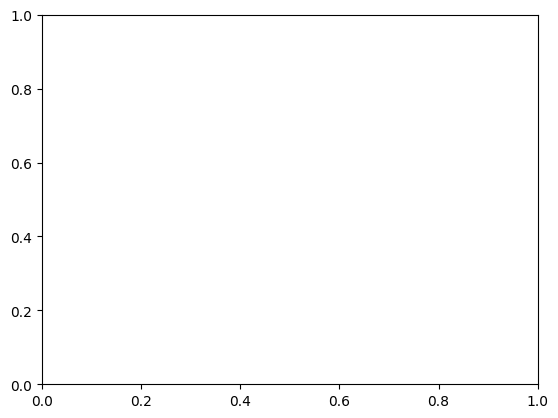

In [93]:
E=df2[['E(uJ)']].values.tolist()
y1=df2[['RA']].values.tolist()
y2=df2[['MSE']].values.tolist()
sns.lineplot(x=E, y=y1)